<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_Arima(AirlinesData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
files=files.upload()

Saving AirlinesData.xlsx to AirlinesData.xlsx


In [8]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
series = pd.read_excel("AirlinesData.xlsx",header=0, index_col=0, parse_dates=True)


In [24]:
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


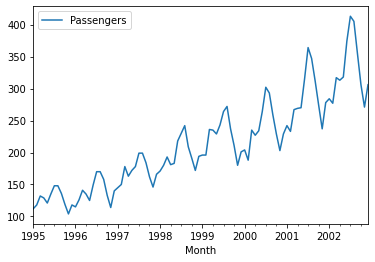

In [25]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f86eb278>]],
      dtype=object)

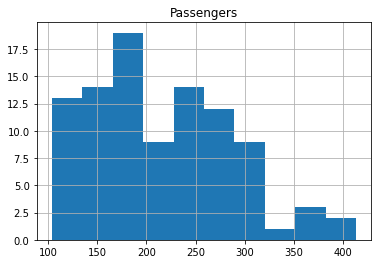

In [26]:
series.hist()

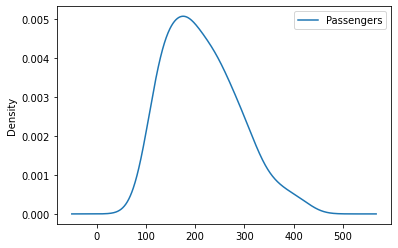

In [27]:
series.plot(kind='kde')

In [28]:
# separate out a validation dataset
dataset = series.head(84)
validation = series.tail(12)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


#### Persistence/ Base model

In [30]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [31]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

#### ARIMA Hyperparameters

In [32]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
#def evaluate_arima_model(X, arima_order):
# prepare training dataset
#    X = X.astype('float32')
 #   train_size = int(len(X) * 0.50)
  #  train, test = X[0:train_size], X[train_size:]
   # history = [x for x in train]
# make predictions
    #predictions = list()
    #for t in range(len(test)):
     #   model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
      #  model_fit = model.fit(disp=0)
       # yhat = model_fit.forecast()[0]
        #predictions.append(yhat)
       # history.append(test[t])
# calculate out of sample error
   # rmse = sqrt(mean_squared_error(test, predictions))
    #return rmse

In [41]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(5,1,5)).fit(disp=0)
pred=model.forecast(steps=35)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


26.029287422266048

#### Grid search for p,d,q values

In [54]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [57]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(1, 5)
q_values = range(1, 15)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


#### Build Model based on the optimized values

In [56]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [58]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

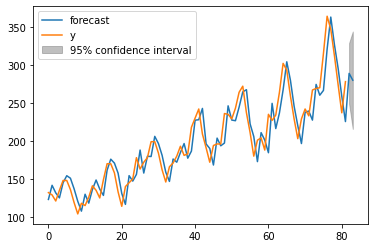

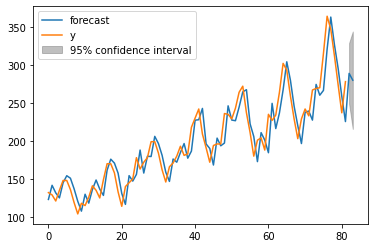

In [64]:
# fit model
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1, 84)

In [65]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

92.98684507519704

#### Combine train and test data and build final model

In [67]:
# fit model
data = pd.read_excel("AirlinesData.xlsx",header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [68]:
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()

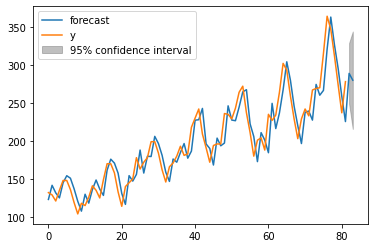

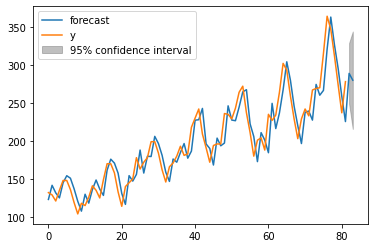

In [70]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,84)

In [71]:
pd.DataFrame(forecast)

,0
0,288.833834
1,279.864285
2,271.795302
3,264.536465
4,258.006435
5,252.132038
6,246.847445
7,242.093439
8,237.816748
9,233.969448
